# Regression Analysis

머신러닝의 task 중에 regression에 대해서 다룬다.<br>
**classification vs regression**

# Code 01

## Loading the Housing dataset into a data frame

Attributes:
    
<pre>
1. CRIM      도시별 인구 당 범죄 발생 건수
2. ZN        25,000 ft^2 이상의 주택 면적의 비용
3. INDUS     마을 당 비소매 영업 비율
4. CHAS      찰스강이 근방에 있는가에 대한 더미 변수 (1이면 근처, 0이면 아님)
5. NOX       산화 질소 농도
6. RM        주거당 평균 객실 수
7. AGE       1940년 이전에 건설된 건물 중 소유자가 거주하는 비율
8. DIS       보스턴 5개 직장 구역과의 가중 거리
9. RAD       방사형 고속도로 접근 가능 지수
10. TAX      $10,000 자산 당 세금 비율
11. PTRATIO  도시별 선생 비율
12. B        1000(Bk - 0.63)^2, Bk:흑인 비율
13. LSTAT    % lower status of the population
14. MEDV     소유자가 거주하는 주택의 중앙값 (단위 $1000)
</pre>

In [1]:
import pandas as pd

df = pd.read_csv('data/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<br>
<br>

## Visualizing the important characteristics of a dataset

변수간 간단한 (음, 양의) 상관관계 확인가능
- sns.pairplot
- sns.heatmap

In [2]:
import matplotlib.pyplot as plt
#seaborn : 통계 데이터 시각화 도구
import seaborn as sns

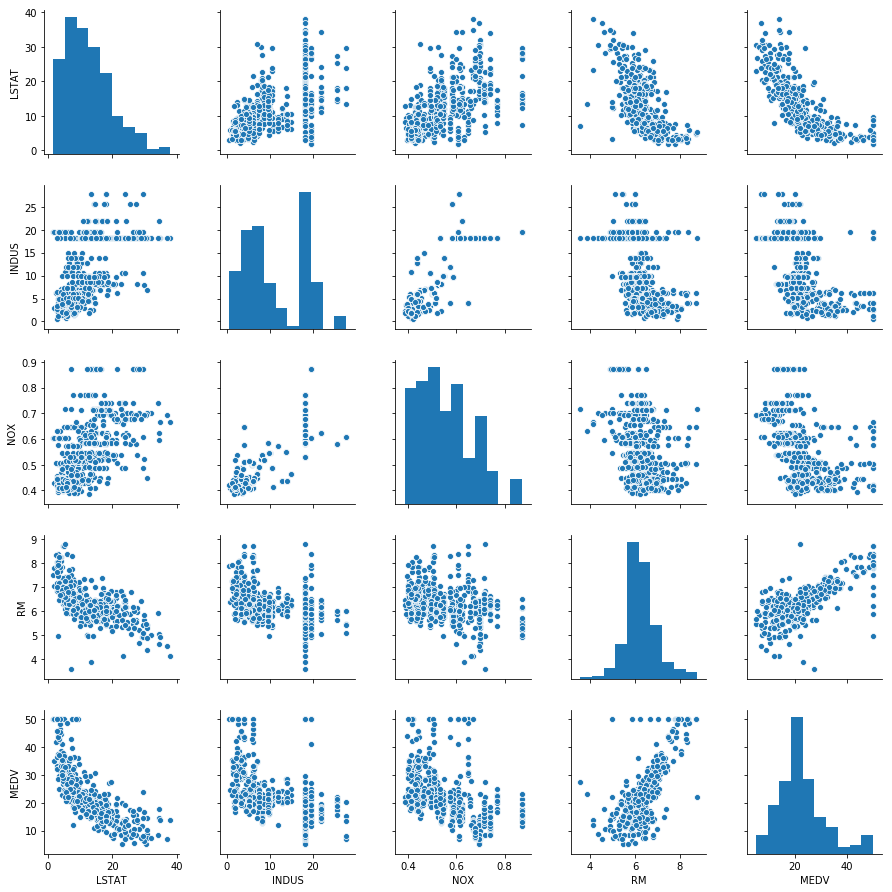

In [3]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

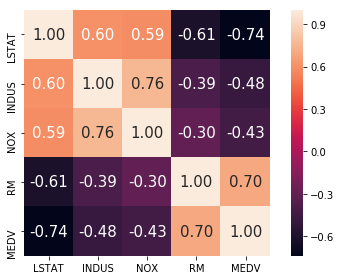

In [4]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True, # colorbar
                 annot=True, # 숫자 표시
                 square=True, # 정사각형
                 fmt='.2f', # 숫자 소수 둘째자리까지 표시
                 annot_kws={'size': 15}, # 숫자 크기
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

<br>
<br>

# Code 02

# Evaluating the performance of linear regression models

In [5]:
X = df[['RM']].values
y = df['MEDV'].values

In [6]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


In [10]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

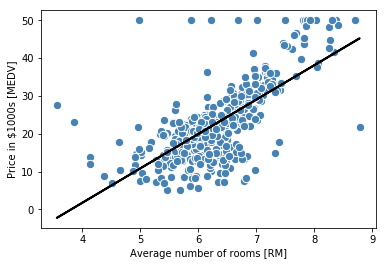

In [11]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

plt.show()

**Normal Equations** alternative:

In [12]:
# 상수 벡터 추가
#stack arrays horrizentally
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
#inverse matrix
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671


<br>

In [13]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [14]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

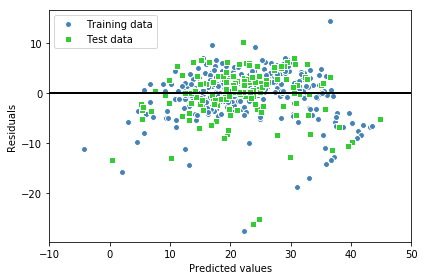

In [15]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

In [16]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


<br>
<br>

# Using regularized methods for regression

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.11311792  0.04725111 -0.03992527  0.96478874 -0.          3.72289616
 -0.02143106 -1.23370405  0.20469    -0.0129439  -0.85269025  0.00795847
 -0.52392362]


In [18]:
slr.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [19]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 20.926, test: 28.876
R^2 train: 0.753, test: 0.653


Ridge regression:

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

LASSO regression:

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

Elastic Net regression:

In [22]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

**exercise)** 각 모델에 대해 성능을 평가하라

<br>
<br>

# Code 03

## Decision tree regression

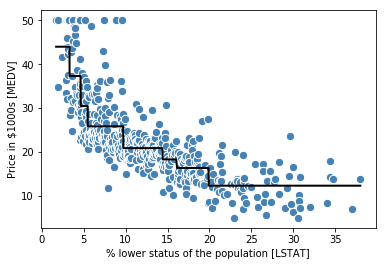

In [23]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')

plt.show()

<br>
<br>

## Random forest regression

In [24]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

#Seed state가 1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [25]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', #mae mse 중 선택
                               random_state=1, 
                               n_jobs=-1) #fit과 predict를 병행할 프로젝트 수
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.641, test: 11.056
R^2 train: 0.979, test: 0.878


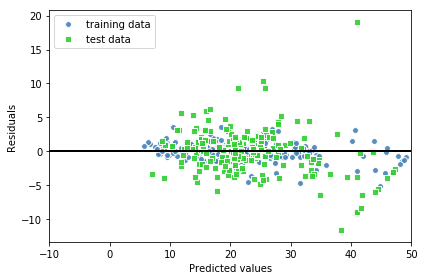

In [26]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_14.png', dpi=300)
plt.show()

**exercise)** 예제에서 파라미터를 변경하여 더 나은 성능을 얻도록 시도해보라 <br>
**exercise)** 위의 excercise에서 **성능의 의미**와 excercise에서의 시도가 의미가 있는지 논하라<br>
**exercise)** 예제 데이터 셋을 변경하여 위 전체 과정을 실험해보라